In [1]:
from keras.models import load_model, Model
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

2023-03-09 21:28:54.741429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 21:28:54.805486: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Visualizing intermediate activations

In [2]:
model = load_model('small_cnn2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

2023-03-09 21:28:57.389477: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-03-09 21:28:57.389501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: kk21
2023-03-09 21:28:57.389506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: kk21
2023-03-09 21:28:57.389688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.86.1
2023-03-09 21:28:57.389703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.86.1
2023-03-09 21:28:57.389715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 515.86.1
2023-03-09 21:28:57.390212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (on

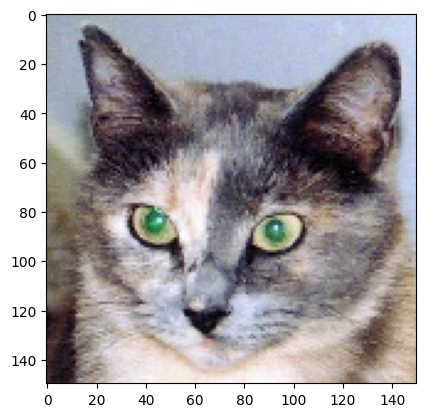

In [3]:
img_path = "cats_and_dogs/test/cats/cat.1700.jpg"
img = load_img(img_path, target_size=(150,150))
img_tensor = np.array(img) / 255
img_tensor = np.expand_dims(img_tensor, axis=0)
plt.imshow(img_tensor[0])
plt.show()

In [4]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [5]:
layer_outputs

[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_7')>]

In [6]:
activations = activation_model.predict(img_tensor)
first_layer_activarion = activations[0]
activations[0].shape

1/1 [==============================] - 0s 76ms/step


(1, 148, 148, 32)

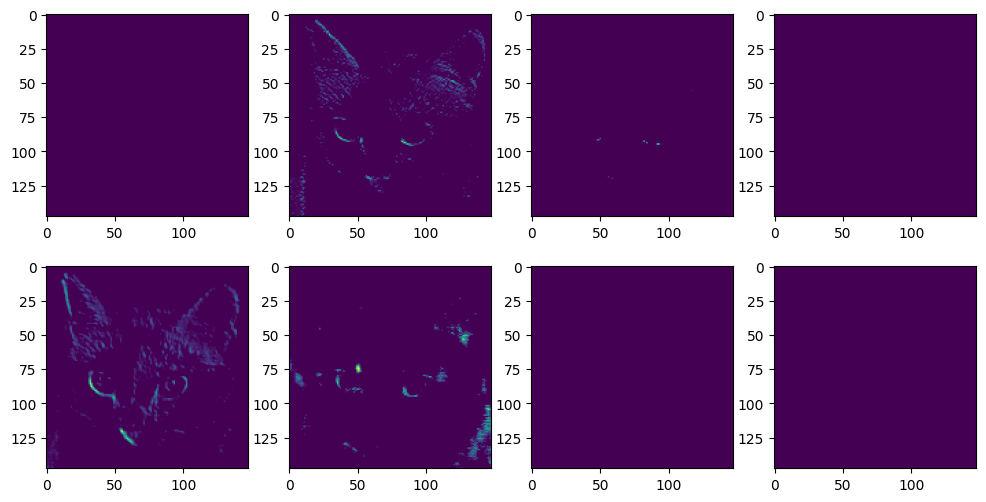

In [7]:
fig, axarr = plt.subplots(2,4,figsize=(12,6))
for i in range(4):
    for j in range(2):
        axarr[j,i].imshow(first_layer_activarion[0, :, :, i*2+j], cmap='viridis')

In [8]:
for a in activations:
    print(a.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


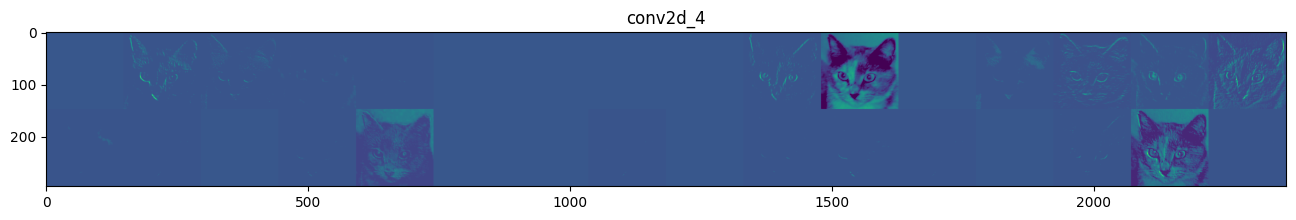

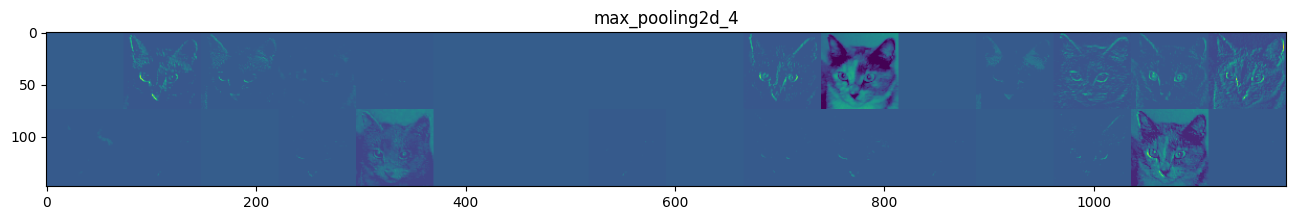

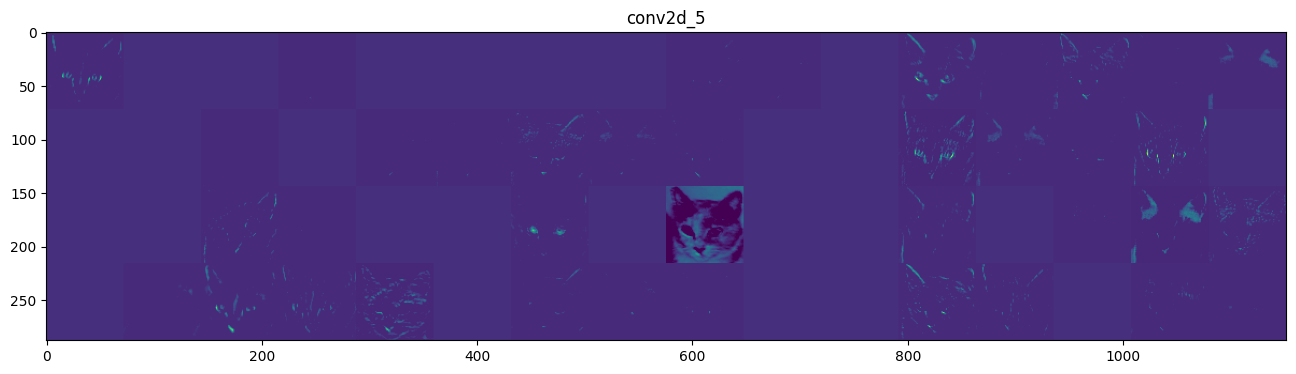

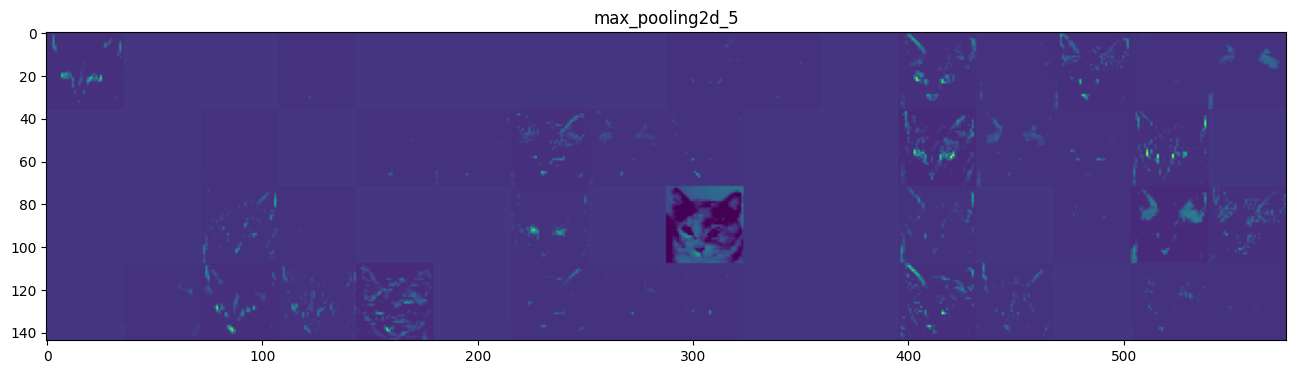

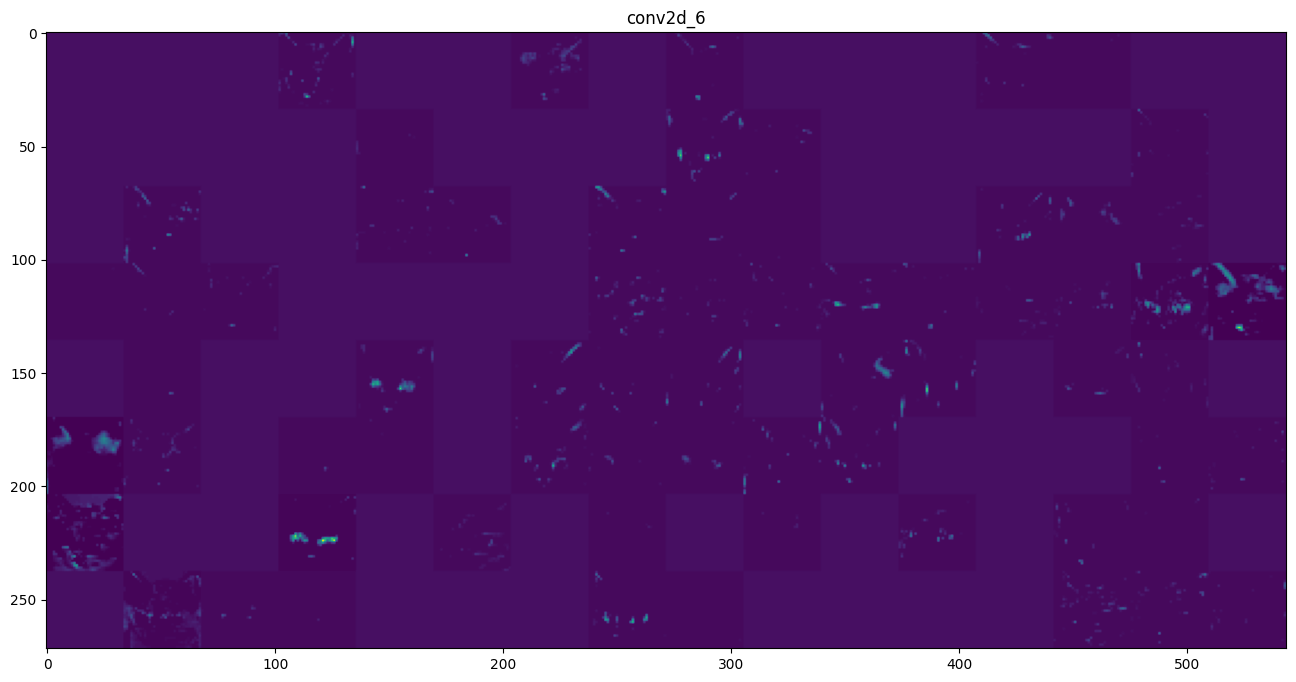

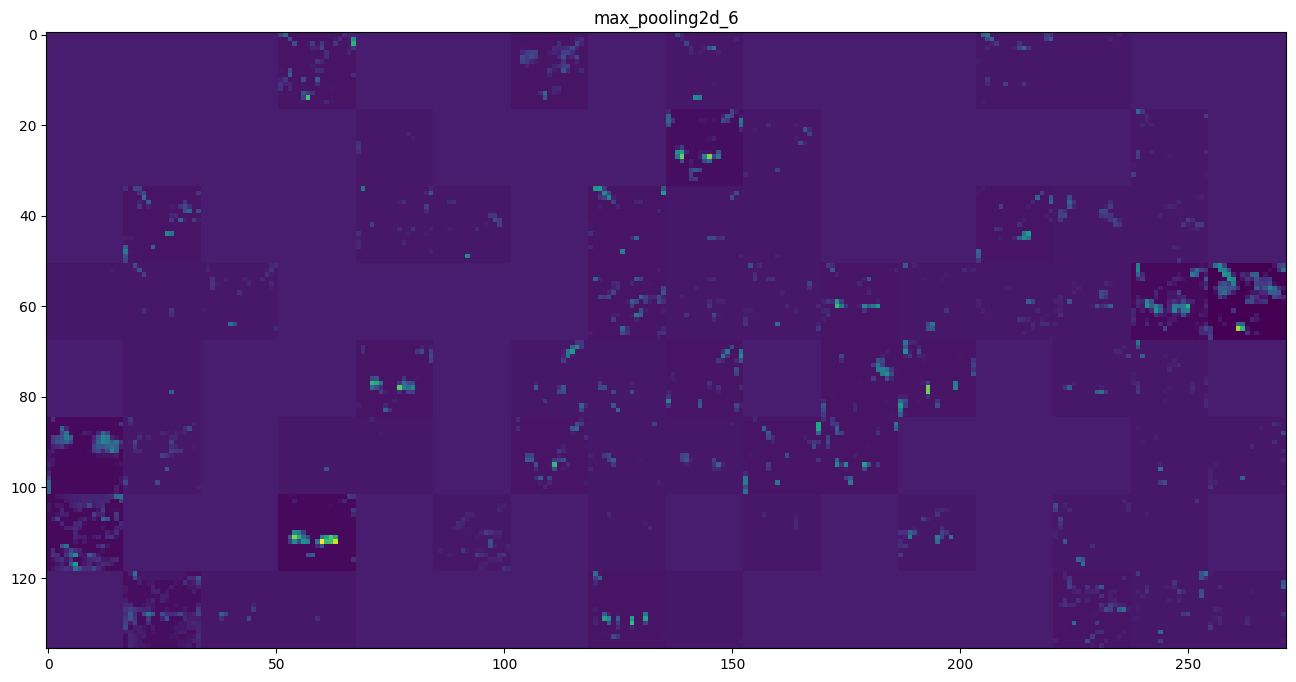

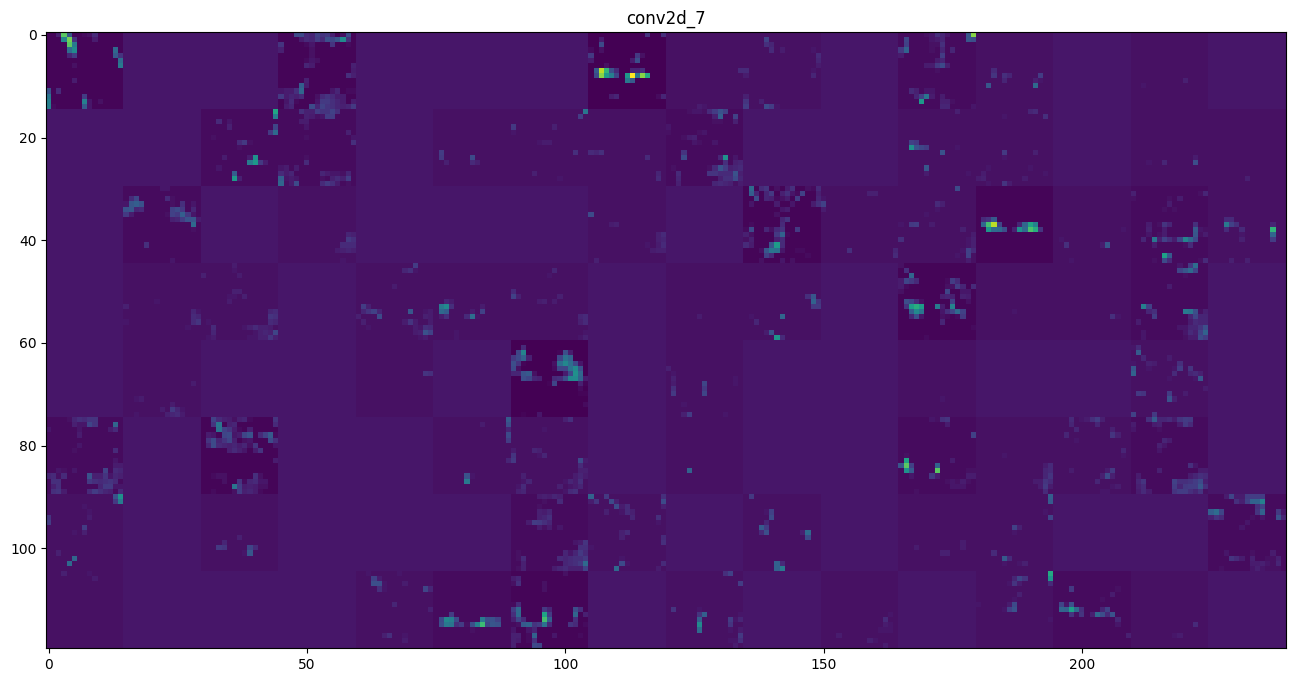

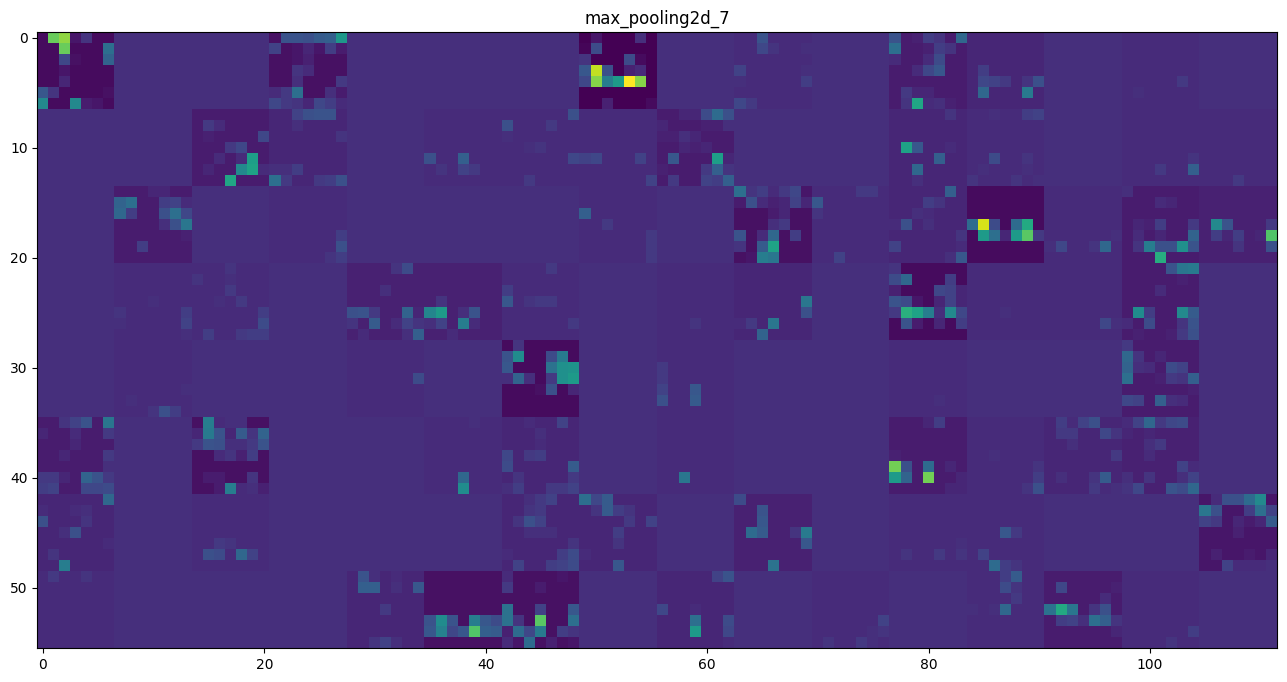

In [9]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

img_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    # map will have size: (1, size, size, n_features)
    n_cols = n_features // img_per_row
    display_grid = np.zeros((size * n_cols, img_per_row * size))
    
    for col in range(n_cols):
        for row in range(img_per_row):
            channel_img = layer_activation[0, :, :, col * img_per_row + row]
            channel_img -= channel_img.mean()
            channel_img *= 64
            channel_img += 128
            channel_img = np.clip(channel_img,0,255).astype('uint8')
            display_grid[col * size : (col+1) * size,
                         row * size : (row+1) * size] = channel_img
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

## Visualizing convolution filters

In [10]:
# TODO

## Visualizing heatmap of class activation
#### Useful when debugging net's decision-making process or when locating objects (CAM)

In [11]:
# TODO